In [1]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

#### Функции

In [2]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(h))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, рад/с')
    ax[0].grid(True)

    ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, рад/с')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

### Анализ фильтров, представленных в виде коэффициентов передаточной характеристики

#### Исходные данные

In [3]:
# Исходные данные

# Коэффициенты прямых связей
b = [1., 0., -1.]

# Коэффициенты обратных связей
a = [1., -1.8, 0.9]

#### Импульсная характеристика фильтра

Результаты расчета: 
1.0 1.8 1.34 0.792 0.2196 -0.3175 -0.7692 -1.0987 -1.2855 -1.325 -1.2281 -1.018 -0.7272 -0.3927 -0.0524 0.2591 0.5136 0.6912 0.782 0.7855 0.7101 0.5712 0.3891 0.1863 -0.0149 -0.1944 -0.3366 -0.4308 -0.4726 -0.4629


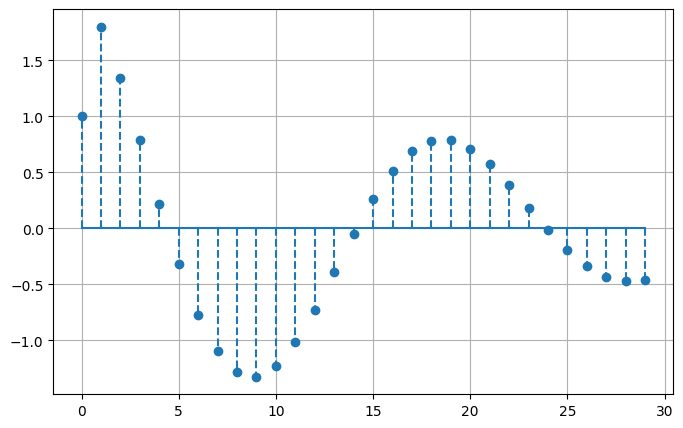

In [4]:
# Импульсная характеристика фильтра

# Входной сигнал
x = [1., *np.zeros(shape=29)]

# Отклик фильтра на воздействие единичного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# x - массив исходных значений
y = sp.lfilter(a=a, b=b, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
ax.grid()
plt.show()

Результаты расчета: 
1.0 1.8 1.34 0.792 0.2196 -0.3175 -0.7692 -1.0987 -1.2855 -1.325 -1.2281 -1.018 -0.7272 -0.3927 -0.0524 0.2591 0.5136 0.6912 0.782 0.7855 0.7101 0.5712 0.3891 0.1863 -0.0149 -0.1944 -0.3366 -0.4308 -0.4726 -0.4629


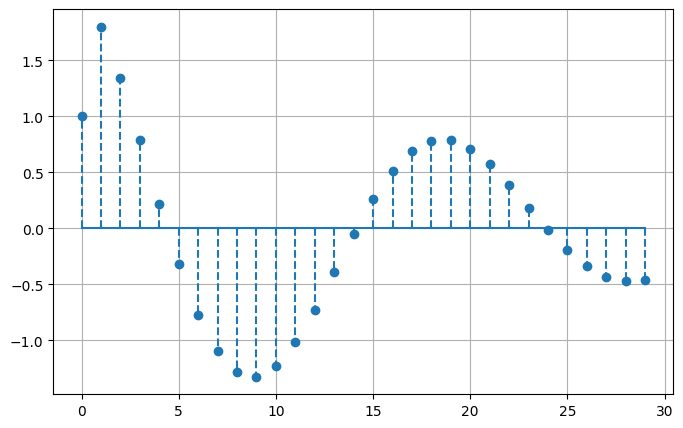

In [5]:
# Импульсная характеристика фильтра

# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dimpulse(system=(b,a,dt), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
ax.grid()
plt.show()

#### Переходная характеристика фильтра

Результаты расчета: 
1.0 2.8 4.14 4.932 5.1516 4.8341 4.0649 2.9662 1.6807 0.3557 -0.8724 -1.8904 -2.6176 -3.0103 -3.0627 -2.8036 -2.29 -1.5988 -0.8169 -0.0314 0.6787 1.2498 1.6389 1.8252 1.8103 1.6159 1.2794 0.8485 0.3759 -0.087


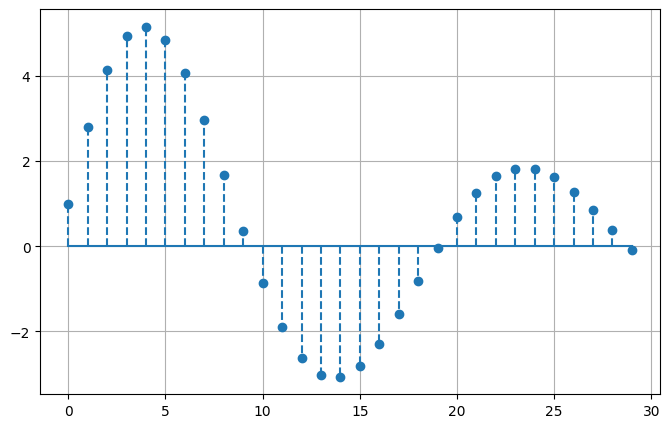

In [6]:
# Переходная характеристика фильтра

# Входной сигнал
x = np.ones(shape=30)

# Отклик фильтра на воздействие входного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# x - массив исходных значений
y = sp.lfilter(a=a, b=b, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
ax.grid()
plt.show()

Результаты расчета: 
1.0 2.8 4.14 4.932 5.1516 4.8341 4.0649 2.9662 1.6807 0.3557 -0.8724 -1.8904 -2.6176 -3.0103 -3.0627 -2.8036 -2.29 -1.5988 -0.8169 -0.0314 0.6787 1.2498 1.6389 1.8252 1.8103 1.6159 1.2794 0.8485 0.3759 -0.087


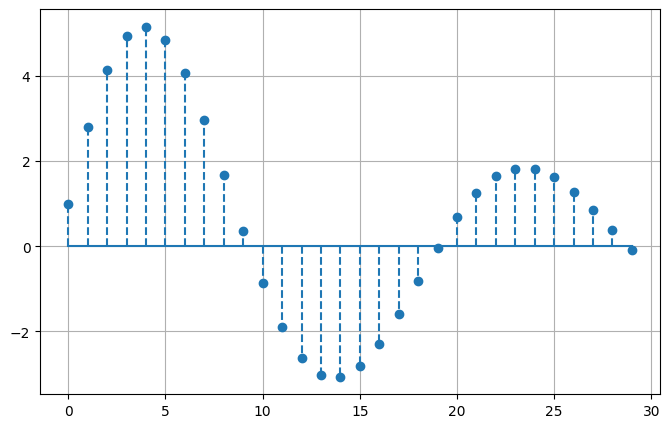

In [7]:
# Переходная характеристика фильтра

# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dstep(system=(b,a,dt), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(*y, linefmt='C0--', basefmt='C0-')
ax.grid()
plt.show()

#### Расчет нулей и полюсов

In [8]:
import cmath as cm

# Находим нули. Решаем квадратное уравнение для числителя передаточной функции
z = []
dis = b[1]**2 - 4*b[0]*b[2]
z.append((-b[1] - cm.sqrt(dis)) / 2*b[0])
z.append((-b[1] + cm.sqrt(dis)) / 2*b[0])

print(f'Нули: {z}')

# Находим полюса. Решаем квадратное уравнение для знаменателя передаточной функции
p = []
dis = a[1]**2 - 4*a[0]*a[2]
p.append((-a[1] - cm.sqrt(dis)) / 2*a[0])
p.append((-a[1] + cm.sqrt(dis)) / 2*a[0])

print(f'Полюса: {np.round(a=p, decimals=1)}')

Нули: [(-1+0j), (1+0j)]
Полюса: [0.9-0.3j 0.9+0.3j]


In [9]:
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

print(f'Нули: {z}')
print(f'Полюса: {p}')
print(f'Коэффициент усиления: {k}')

Нули: [-1.  1.]
Полюса: [0.9+0.3j 0.9-0.3j]
Коэффициент усиления: 1.0


#### Диаграмма нулей и полюсов

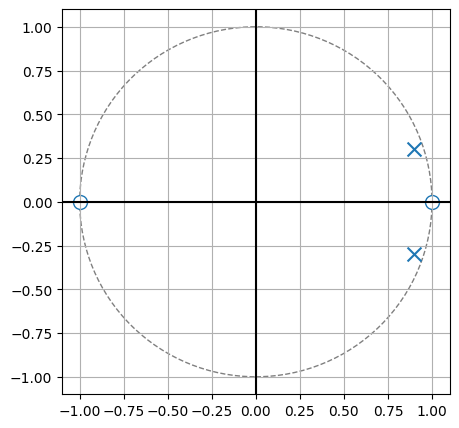

In [10]:
ZerosPolesDiagram(z=z, p=p)

#### Амплитудно-частотная и фазочастотная характеристики фильтра

In [11]:
# Определяем АЧХ и ФЧХ фильтра

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# worN - количество вычисляемых откликов
# whole - False: вычисляется отклик на частоты от 0 до Пи, True: вычисляется отклик на частоты от 0 до 2Пи
# include_nyquist - вычислять отклик для конечной частоты (в данном случае для 2Пи), который по умолчанию не вычисляется
w, h = sp.freqz(b=b, a=a, worN=512, whole=True, include_nyquist=True)

In [12]:
# Пример расчета модуля отклика фильтра
print(np.sqrt(h[5].real**2 + h[5].imag**2), abs(h[5]))

1.2693281571402024 1.2693281571402024


In [13]:
# Пример расчета аргумента отклика фильтра
print(np.arctan(h[5].imag/h[5].real), np.angle(h[5]))

1.5072872345674375 1.5072872345674375


In [14]:
# Расчет АЧХ по откликам фильтра
fr = FrequencyResponse(h=h)

# Расчет ФЧХ по откликам фильтра
pr = PhaseResponse(h=h)

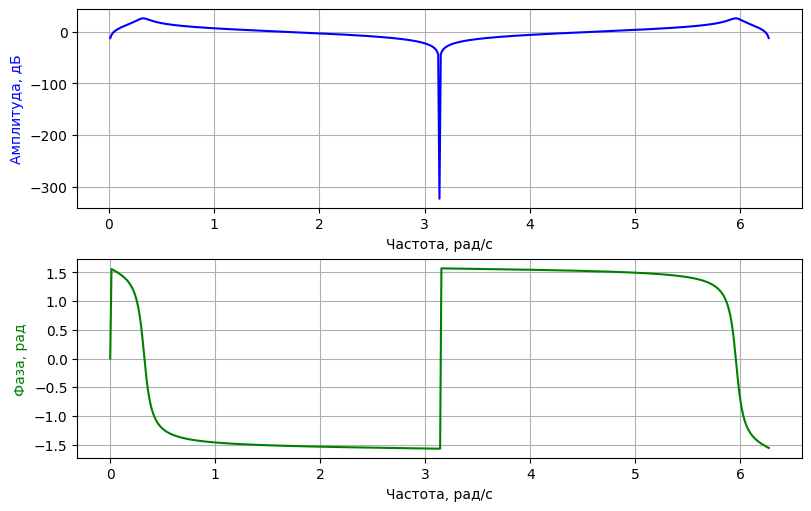

In [15]:
# Графики АЧХ и ФЧХ
FRPRDiagram(w=w, fr=fr, pr=pr)

### Анализ фильтров порядков выше второго

#### Исходные данные

In [16]:
# Исходные данные

# Коэффициенты прямых связей
b = [9.05323153e-05, 6.33726207e-04, 1.90117862e-03, 3.16863103e-03, 3.16863103e-03, 1.90117862e-03, 6.33726207e-04, 9.05323153e-05]

# Коэффициенты обратных связей
a = [ 1., -4.18137782,  7.8684983 , -8.52613442,  5.70595868, -2.34732689,  0.54775792, -0.05578763]

#### Импульсная характеристика фильтра

Результаты расчета: 
0.0001 0.001 0.0054 0.0186 0.0466 0.0906 0.1435 0.1897 0.2122 0.2003 0.1545 0.0868 0.0162 -0.0394 -0.0682 -0.0685 -0.0471 -0.016 0.0126 0.0299 0.0331 0.0245 0.0097 -0.0048 -0.0143 -0.0167 -0.0129 -0.0057 0.0018 0.007


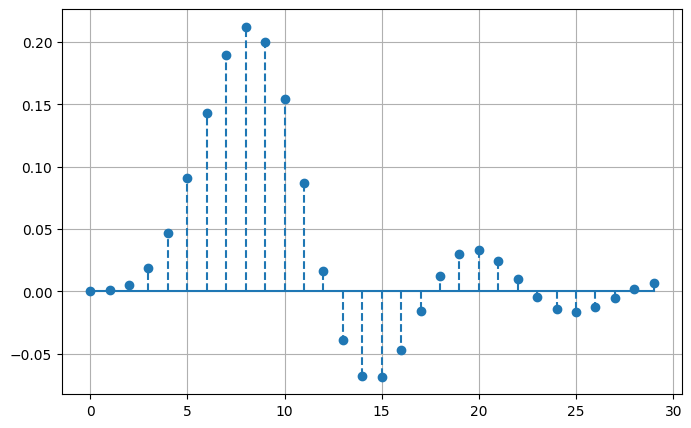

In [17]:
# Импульсная характеристика фильтра

# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dimpulse(system=(b,a,dt), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(t,*y, linefmt='C0--', basefmt='C0-')
ax.grid()
plt.show()

#### Переходная характеристика фильтра

Результаты расчета: 
0.0001 0.0011 0.0065 0.0252 0.0718 0.1624 0.3059 0.4955 0.7078 0.9081 1.0625 1.1494 1.1656 1.1262 1.0579 0.9894 0.9423 0.9263 0.9389 0.9688 1.0019 1.0264 1.0362 1.0314 1.0171 1.0004 0.9874 0.9818 0.9836 0.9906


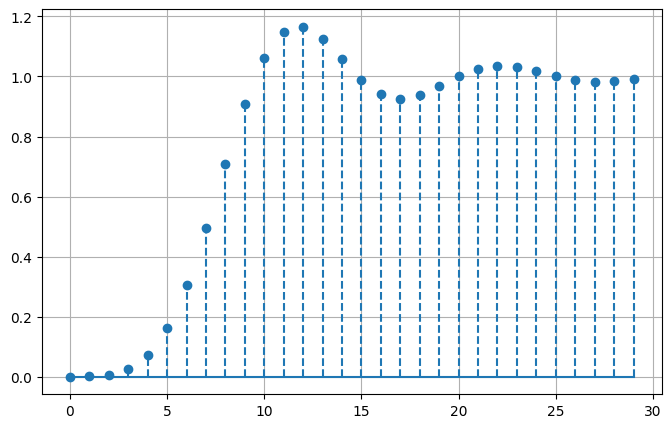

In [18]:
# Переходная характеристика фильтра

# Возвращаемые значения:
# t - отсчеты времени, для которых рассчитываются значения
# y - массив результирующих значений
# Параметры:
# system - описание фильтра, состоящее из следующих аргументов:
#   b - коэффициенты прямых связей
#   a - коэффициенты обратных связей
#   dt - шаг временных отсчетов
# n = количество рассчитываемых отсчетов
dt = 1
t, y = sp.dstep(system=(b,a,1), n=30)

print('Результаты расчета: ')
print(*list(np.round(a=y[0][:,0], decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(*y, linefmt='C0--', basefmt='C0-')
ax.grid()
plt.show()

#### Расчет нулей и полюсов

In [19]:
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

print(f'Нули: {z}')
print(f'Полюса: {p}')
print(f'Коэффициент усиления: {k}')

Нули: [-1.04696205+0.02794556j -1.04696205-0.02794556j -0.99857357+0.05339408j
 -0.99857357-0.05339408j -0.99999967+0.j         -0.95446454+0.02547662j
 -0.95446454-0.02547662j]
Полюса: [0.71530592+0.50689762j 0.71530592-0.50689762j 0.59190709+0.3363729j
 0.59190709-0.3363729j  0.5287821 +0.16676651j 0.5287821 -0.16676651j
 0.50938762+0.j        ]
Коэффициент усиления: 9.05323153e-05


#### Диаграмма нулей и полюсов

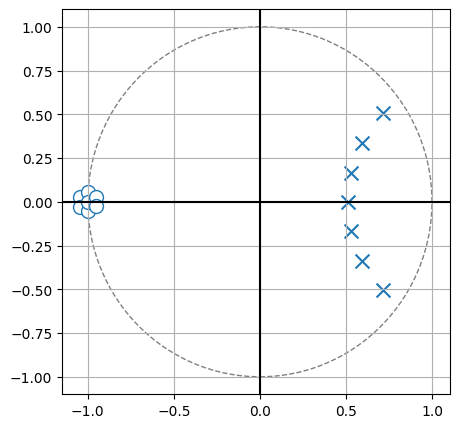

In [20]:
ZerosPolesDiagram(z=z, p=p)

#### Амплитудно-частотная и фазочастотная характеристики фильтра

In [21]:
# Определяем АЧХ и ФЧХ фильтра

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
# worN - количество вычисляемых откликов
# whole - False: вычисляется отклик на частоты от 0 до Пи, True: вычисляется отклик на частоты от 0 до 2Пи
# include_nyquist - вычислять отклик для конечной частоты (в данном случае для 2Пи), который по умолчанию не вычисляется
w, h = sp.freqz(b=b, a=a, worN=512, whole=True, include_nyquist=True)

In [22]:
# Расчет АЧХ по откликам фильтра
fr = FrequencyResponse(h=h)

# Расчет ФЧХ по откликам фильтра
pr = PhaseResponse(h=h)

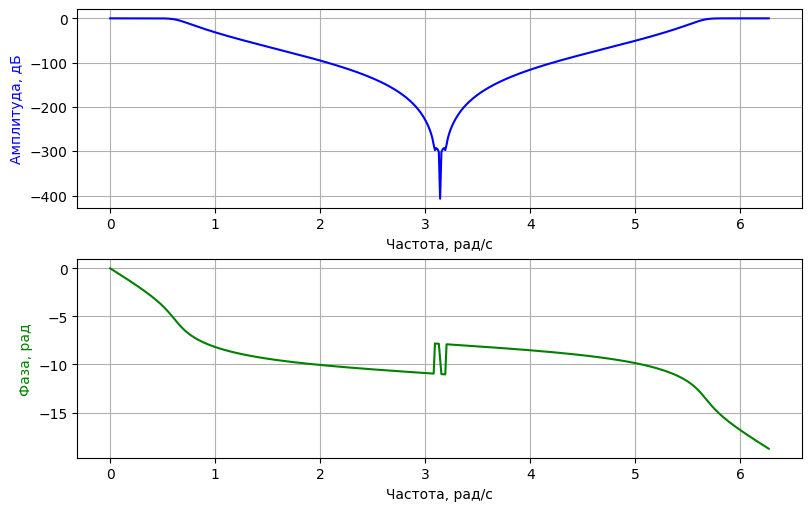

In [23]:
# Графики АЧХ и ФЧХ
FRPRDiagram(w=w, fr=fr, pr=pr)

### Анализ фильтров, представленных в виде каскадов секций второго порядка

#### Исходные данные

In [24]:
# Коэффициенты секций второго порядка [b0,b1,b2,a0,a1,a2], где b - коэффициенты прямых связей, a - коэффициенты обратных связей
s = [[ 9.05323153e-05,  1.81064631e-04,  9.05323153e-05, 1.00000000e+00, -5.09391202e-01,  0.00000000e+00],
     [ 1.00000000e+00,  2.00000000e+00,  1.00000000e+00, 1.00000000e+00, -1.05756028e+00,  3.07418914e-01],
     [ 1.00000000e+00,  2.00000000e+00,  1.00000000e+00, 1.00000000e+00, -1.18381412e+00,  4.63501416e-01],
     [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, 1.00000000e+00, -1.43061222e+00,  7.68607906e-01]]

#### Импульсная характеристика фильтра

Результаты расчета: 
0.0001 0.001 0.0054 0.0186 0.0466 0.0906 0.1435 0.1897 0.2122 0.2003 0.1545 0.0868 0.0162 -0.0394 -0.0682 -0.0685 -0.0471 -0.016 0.0126 0.0299 0.0331 0.0245 0.0097 -0.0048 -0.0143 -0.0167 -0.0129 -0.0057 0.0018 0.007


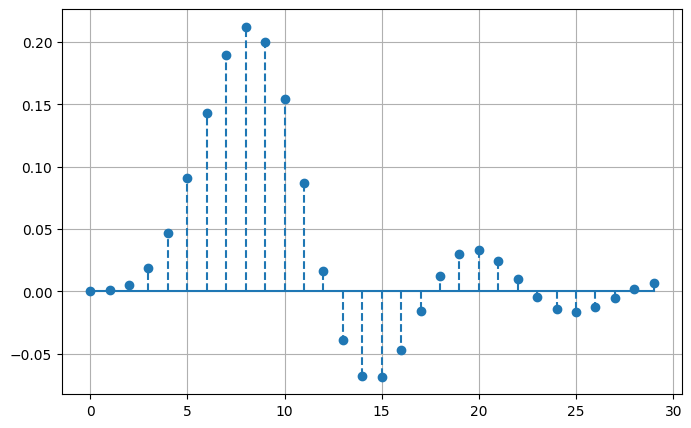

In [25]:
# Импульсная характеристика фильтра

# Входной сигнал
x = [1., *np.zeros(shape=29)]

# Отклик фильтра на воздействие единичного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# sos - коэффициенты секций второго порядка
# x - массив исходных значений
y = sp.sosfilt(sos=s, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
ax.grid()
plt.show()

#### Переходная характеристика фильтра

Результаты расчета: 
0.0001 0.0011 0.0065 0.0252 0.0718 0.1624 0.3059 0.4955 0.7078 0.9081 1.0625 1.1494 1.1656 1.1262 1.0579 0.9894 0.9423 0.9263 0.9389 0.9688 1.0019 1.0264 1.0362 1.0314 1.0171 1.0004 0.9874 0.9818 0.9836 0.9906


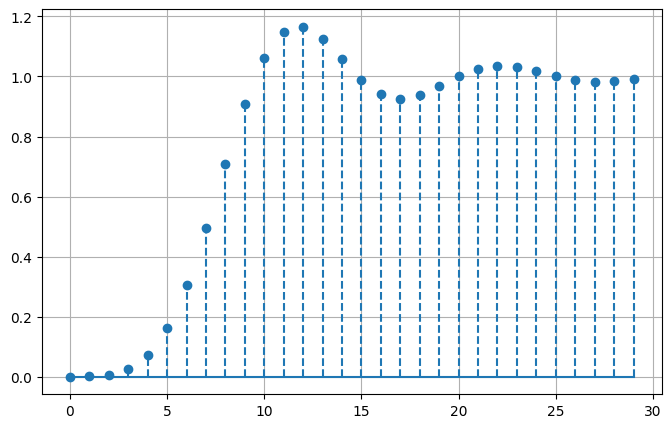

In [26]:
# Переходная характеристика фильтра

# Входной сигнал
x = np.ones(shape=30)

# Отклик фильтра на воздействие входного сигнала x
# Возвращаемое значение:
# y - массив результирующих значений
# Параметры:
# sos - коэффициенты секций второго порядка
# x - массив исходных значений
y = sp.sosfilt(sos=s, x=x)

print('Результаты расчета: ')
print(*list(np.round(a=y, decimals=4)))

fg, ax = plt.subplots(figsize=(8, 5))
ax.stem(y, linefmt='C0--', basefmt='C0-')
ax.grid()
plt.show()

#### Расчет нулей и полюсов

In [27]:
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# sos - коэффициенты секций второго порядка
z, p, k = sp.sos2zpk(sos=s)

print(f'Нули: {z}')
print(f'Полюса: {p}')
print(f'Коэффициент усиления: {k}')

Нули: [-1.00006647+0.j -0.99993353+0.j -1.        +0.j -1.        +0.j
 -1.        +0.j -1.        +0.j -1.        +0.j  0.        +0.j]
Полюса: [0.5093912 +0.j         0.        +0.j         0.52878014+0.16676474j
 0.52878014-0.16676474j 0.59190706+0.33637397j 0.59190706-0.33637397j
 0.71530611+0.5068975j  0.71530611-0.5068975j ]
Коэффициент усиления: 9.05323153e-05


#### Диаграмма нулей и полюсов

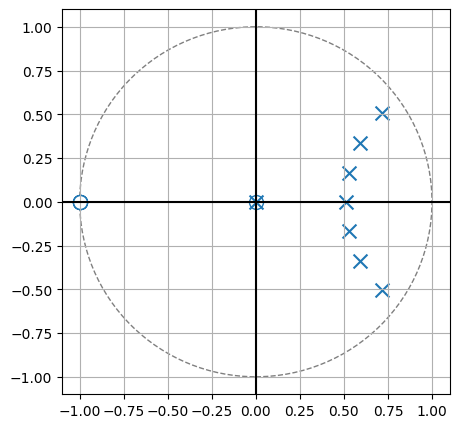

In [28]:
ZerosPolesDiagram(z=z, p=p)

#### Амплитудно-частотная и фазочастотная характеристики фильтра

In [29]:
# Определяем АЧХ и ФЧХ фильтра

# Функция freqz возвращает отклик цифрового фильтра
# Возвращаемые значения:
# w - частоты, для которых был рассчитан отклик фильтра
# h - отклик фильтра, представленный в виде комплексных чисел
# Параметры:
# sos - коэффициенты секций второго порядка
# worN - количество вычисляемых откликов
# whole - False: вычисляется отклик на частоты от 0 до Пи, True: вычисляется отклик на частоты от 0 до 2Пи
w, h = sp.sosfreqz(sos=s, worN=512, whole=True)

In [30]:
# Расчет АЧХ по откликам фильтра
fr = FrequencyResponse(h=h)

# Расчет ФЧХ по откликам фильтра
pr = PhaseResponse(h=h)

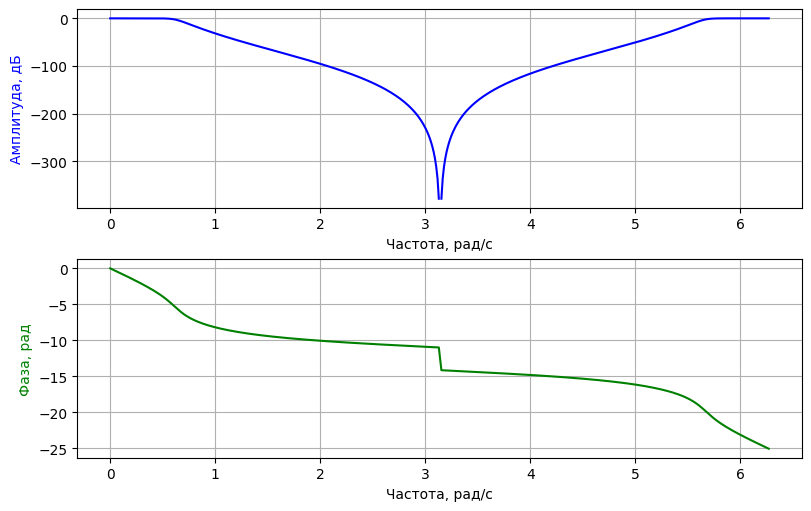

In [31]:
# Графики АЧХ и ФЧХ
FRPRDiagram(w=w, fr=fr, pr=pr)